# Machine Learning - Logistic Regression

## Dataset

In [168]:
import pandas as pd
import numpy as np

train_data = pd.read_csv('../data/dataset_train.csv').dropna()

# Remove the columns that are not features and standardize the data
def standardize(x):
    means = np.mean(x, axis=0)
    stds = np.std(x, axis=0)

    stds[stds == 0] = 1
    return (x - means) / stds
train_data_filtered = train_data.drop(columns = ['Hogwarts House', 'First Name', 'Last Name', 'Birthday', 'Best Hand', 'Index', 'Astronomy', 'Arithmancy', 'Care of Magical Creatures'])
x_train_standardized = standardize(train_data_filtered)

y_true = {
    'gryffindor': (train_data['Hogwarts House'] == 'Gryffindor').astype(int),
    'slytherin': (train_data['Hogwarts House'] == 'Slytherin').astype(int),
    'ravenclaw': (train_data['Hogwarts House'] == 'Ravenclaw').astype(int),
    'hufflepuff': (train_data['Hogwarts House'] == 'Hufflepuff').astype(int)
}
train_data

,Index,Hogwarts House,First Name,Last Name,Birthday,Best Hand,Arithmancy,Astronomy,Herbology,Defense Against the Dark Arts,Divination,Muggle Studies,Ancient Runes,History of Magic,Transfiguration,Potions,Care of Magical Creatures,Charms,Flying
0,0,Ravenclaw,Tamara,Hsu,2000-03-30,Left,58384.0,-487.886086,5.727180,4.878861,4.722,272.035831,532.484226,5.231058,1039.788281,3.790369,0.715939,-232.79405,-26.89
1,1,Slytherin,Erich,Paredes,1999-10-14,Right,67239.0,-552.060507,-5.987446,5.520605,-5.612,-487.340557,367.760303,4.107170,1058.944592,7.248742,0.091674,-252.18425,-113.45
2,2,Ravenclaw,Stephany,Braun,1999-11-03,Left,23702.0,-366.076117,7.725017,3.660761,6.140,664.893521,602.585284,3.555579,1088.088348,8.728531,-0.515327,-227.34265,30.42
3,3,Gryffindor,Vesta,Mcmichael,2000-08-19,Left,32667.0,697.742809,-6.497214,-6.977428,4.026,-537.001128,523.982133,-4.809637,920.391449,0.821911,-0.014040,-256.84675,200.64
5,5,Slytherin,Corrine,Hammond,1999-04-04,Right,21209.0,-613.687160,-4.289197,6.136872,-6.592,-440.997704,396.201804,5.380286,1052.845164,11.751212,1.049894,-247.94549,-34.69
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1595,1595,Gryffindor,Jung,Blank,2001-09-14,Right,49009.0,354.280086,-4.541837,-3.542801,5.702,-497.235066,618.220213,-5.231721,964.219853,3.389086,-0.649983,-250.39401,185.83
1596,1596,Slytherin,Shelli,Lock,1998-03-12,Left,63296.0,367.531174,6.061064,-3.675312,1.757,-643.271092,445.827565,2.238112,1056.147366,5.825263,-0.333962,-246.42719,44.80
1597,1597,Gryffindor,Benjamin,Christensen,1999-10-24,Right,63905.0,544.018925,-3.203269,-5.440189,6.065,-385.150457,635.211486,-5.984257,953.866685,1.709808,0.071569,-251.63679,198.47
1598,1598,Hufflepuff,Charlotte,Dillon,2001-09-21,Left,82713.0,453.676219,3.442831,-4.536762,6.738,-831.741123,383.444937,3.813111,1087.949205,3.904100,-0.531875,-246.19072,-76.81


## Logistic Regression
### Log loss
The log loss function is used to evaluate the performance of a classification model. It is defined as follows
With y_true representing the true labels and y_pred representing the predicted labels.
The log loss is also known as the cross-entropy loss.

In [147]:
def log_loss(y_true, y_pred):
    y_pred = np.clip(y_pred, 1e-7, 1 - 1e-7) # Clip the values to avoid log(0)
    return -np.mean(y_true * np.log(y_pred) + (1 - y_true) * np.log(1 - y_pred))

# Example log loss
y_true_sample = np.array([0, 1, 1, 0, 1])
y_pred_sample = np.array([0.1, 0.9, 0.8, 0.2, 0.3])
print(log_loss(y_true_sample, y_pred_sample))

0.3721961876540016


### Hypothesis
The hypothesis function for logistic regression is defined as follows
With theta represents the weights of the features and x represents the features of the sample.

In [148]:
def hypothesis(x, theta):
    return 1 / (1 + np.exp(-x @ theta))

# Example hypothesis one feature
x = np.array([2])
theta = np.array([0.5])
print(hypothesis(x, theta))

# Example hypothesis multiple features
x = np.array([1, 3, 4]) #  1 = bias , 3 = feature_1_value, 4 = feature_2_value
theta = np.array([0.5, 0.1, 0.2]) # 0.5 = bias, 0.1 = feature_1_weight, 0.2 = feature_2_weight
print(hypothesis(x, theta))

# Example hypothesis multiple features and multiple samples
x = np.array([[1, 3, 4], [1, 2, 5], [1, 1, 6]]) #  1 = bias , 3 = feature_1_value, 4 = feature_2_value
theta = np.array([0.5, 0.1, 0.2]) # 0.5 = bias, 0.1 = feature_1_weight, 0.2 = feature_2_weight
print(hypothesis(x, theta))

0.7310585786300049
0.8320183851339245
[0.83201839 0.84553473 0.85814894]


## Gradient
### Stochastic Gradient Descent

In [175]:

def stochastic_gradient_descent(x, y_true, theta, learning_rate, epochs):
    m = x.shape[0]
    theta_train = theta
    for epoch in range(epochs):
        for _ in range(m):
            random_index = np.random.randint(m)
            x_i = x[random_index:random_index + 1]
            y_i = y_true[random_index:random_index + 1]
            y_pred = hypothesis(x_i, theta_train)
            gradient = x_i.T @ (y_pred - y_i)
            theta_train -= learning_rate * gradient
    print("Log loss: {}".format(log_loss(y_true, hypothesis(x, theta_train))))
    return theta_train

bias = np.ones((x_train_standardized.shape[0], 1)) # Create a column of ones for the bias, with x_train.shape[0] = number of rows, so we create a column of ones with the same number of rows as x_train plus one column, the bias
initial_theta = np.random.rand(x_bias.shape[1]) * 0.01
x_bias = np.hstack([bias, x_train_standardized]) # Add the bias column to the x_train
theta_train = {
    'gryffindor': stochastic_gradient_descent(x_bias, y_true['gryffindor'], initial_theta , 0.1, 10),
    'slytherin': stochastic_gradient_descent(x_bias, y_true['slytherin'], initial_theta, 0.1, 10),
    'ravenclaw': stochastic_gradient_descent(x_bias, y_true['ravenclaw'], initial_theta, 0.1, 10),
    'hufflepuff': stochastic_gradient_descent(x_bias, y_true['hufflepuff'], initial_theta, 0.1, 10)
}

print("To conclude, the final theta is: ")
theta_train
# features = train_data_filtered.columns.insert(0, 'Bias')
# theta_dict = dict(zip(features, theta_train))
# theta_dict

Log loss: 0.044306145518096855
Log loss: 0.03276521293365426
Log loss: 0.06795109240518281
Log loss: 0.05515150783950265
To conclude, the final theta is: 


{'gryffindor': array([-2.55876082,  1.99310753, -2.49378916,  0.61828525, -0.96602521,
        -1.29944392,  1.23049722,  0.45302266, -0.41090371, -0.58484712,
        -0.4109855 ]),
 'slytherin': array([-2.55876082,  1.99310753, -2.49378916,  0.61828525, -0.96602521,
        -1.29944392,  1.23049722,  0.45302266, -0.41090371, -0.58484712,
        -0.4109855 ]),
 'ravenclaw': array([-2.55876082,  1.99310753, -2.49378916,  0.61828525, -0.96602521,
        -1.29944392,  1.23049722,  0.45302266, -0.41090371, -0.58484712,
        -0.4109855 ]),
 'hufflepuff': array([-2.55876082,  1.99310753, -2.49378916,  0.61828525, -0.96602521,
        -1.29944392,  1.23049722,  0.45302266, -0.41090371, -0.58484712,
        -0.4109855 ])}

### Store theta train

In [160]:
import pickle

def store_theta_train(theta_train):
    # Store data (serialize)
    with open('../data/theta_train.pkl', 'wb') as handle:
        pickle.dump(theta_train, handle, protocol=pickle.HIGHEST_PROTOCOL)
        print("Store theta train:", theta_train)

def load_theta_train():
    # Load data (deserialize)
    with open('../data/theta_train.pkl', 'rb') as handle:
        theta_train = pickle.load(handle)
        print("Theta_train loaded:", theta_train)
        return theta_train
        
store_theta_train(theta_train)
# theta_train = load_theta_train()


Store theta train: [-3.78912619 -1.3208913  -0.39183491  1.46743318 -0.32125768  0.95923047
 -0.40362737 -1.69470572  0.32217927  0.01702317  1.17800333]


### Visualisation

In [173]:
import matplotlib.pyplot as plt

def plot_log_loss(x, y_true, theta):
    log_losses = []
    for i in range(x.shape[0]):
        log_losses.append(log_loss(y_true, hypothesis(x, theta)))
    plt.plot(log_losses)
    
plot_log_loss(x_bias, y_true['gryffindor'], theta_train)
# plot_log_loss(x_bias, theta_train)
plt.xlabel('Epochs')
plt.show()
plt.ylabel('Log loss')
plt.title('Log loss over epochs')

ValueError: matmul: Input operand 1 does not have enough dimensions (has 0, gufunc core with signature (n?,k),(k,m?)->(n?,m?) requires 1)

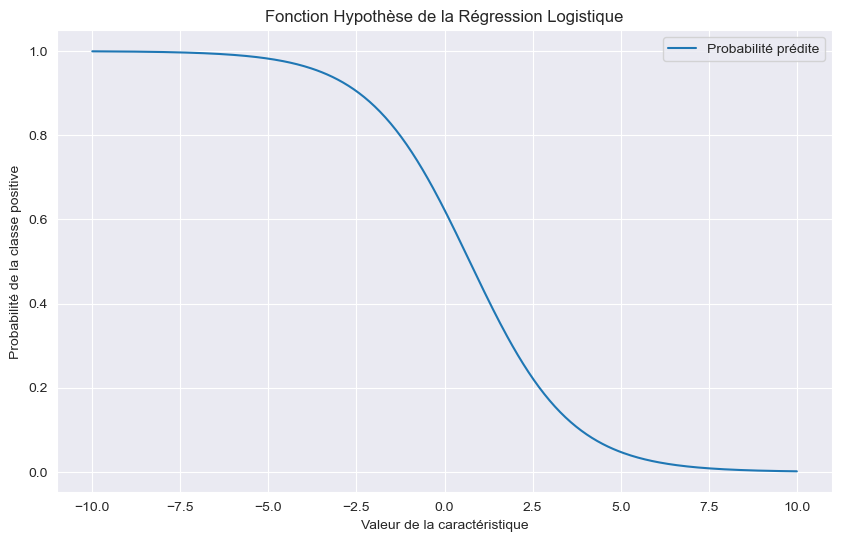

In [112]:
import numpy as np
import matplotlib.pyplot as plt

def hypothesis(x, theta):
    return 1 / (1 + np.exp(-x @ theta))

# Supposons que vous ayez un modèle avec seulement deux paramètres : un biais et un poids pour une seule caractéristique
theta = np.array([0.5, -0.7])  # Exemple de valeurs pour theta

# Générer une gamme de valeurs pour cette caractéristique
feature_range = np.linspace(-10, 10, 400)

# Calculer les probabilités prédites pour chaque valeur de la caractéristique
# Nous ajoutons une colonne de 1s pour le biais
x_bias = np.hstack([np.ones((feature_range.shape[0], 1)), feature_range.reshape(-1, 1)])
probabilities = hypothesis(x_bias, theta)

# Tracer la fonction hypothesis
plt.figure(figsize=(10, 6))
plt.plot(feature_range, probabilities, label='Probabilité prédite')
plt.xlabel('Valeur de la caractéristique')
plt.ylabel('Probabilité de la classe positive')
plt.title('Fonction Hypothèse de la Régression Logistique')
plt.legend()
plt.grid(True)
plt.show()